In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,precision_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV
import itertools
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
import os
li = os.listdir()
print(li)

['.ipynb_checkpoints', '.virtual_documents', 'Advertising-class', 'Alireza_Bakhshifar_400671009.ipynb', 'Auto-mpg_reg', 'Breast-cancer-wisconsin-class', 'breast-final_csv.csv', 'Ecommerce Purchases.csv', 'Forestfire-reg', 'Guid.docx', 'Guid.pdf', 'IRIS-class', 'Loan_Data-class', 'Project (1).rar', 'USA_Housing-reg']


# Business Understanding


In [3]:
df = pd.read_csv('breast-final_csv.csv')

In [4]:
df.columns

Index(['Clump_Thickness', 'Cell_Size_Uniformity', 'Cell_Shape_Uniformity',
       'Marginal_Adhesion', 'Single_Epi_Cell_Size', 'Bare_Nuclei',
       'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

### Features descriptions
**Clump_Thickness**  :   indicating grouping of cancer cells in multilayer<br>
**Cell_Size_Uniforimity** : indicating metastasis to lymph nodes<br>
__Cell_Shape_Uniformity__ : identifying cancerous cells of varying size<br>
__Marginal_Adhesion__ : suggesting loss of adhesion, i.e., a sign of malignancy but the cancerous cells lose this property so 
this retention of adhesion is an indication of malignancy<br>
__Single_Epi_Cell_Size__ :if the SECS become larger, it may be a malignant cell<br>
__Bare_Nuclei__ :without cytoplasm coating, found in benign tumors<br>
__Bland_Chromatin__ :usually found in benign cells<br>
__Normal_Nucleoli__ :generally very small in benign cell<br>
__Mitoses__ :the process in cell division by which the nucleus divides<br>


In [5]:
df

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,benign
1,5,4,4,5,7,10.0,3,2,1,benign
2,3,1,1,1,2,2.0,3,1,1,benign
3,6,8,8,1,3,4.0,3,7,1,benign
4,4,1,1,3,2,1.0,3,1,1,benign
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,benign
695,2,1,1,1,2,1.0,1,1,1,benign
696,5,10,10,3,7,3.0,8,10,2,malignant
697,4,8,6,4,3,4.0,10,6,1,malignant


# Data Understanding and Data Preparation

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Clump_Thickness        699 non-null    int64  
 1   Cell_Size_Uniformity   699 non-null    int64  
 2   Cell_Shape_Uniformity  699 non-null    int64  
 3   Marginal_Adhesion      699 non-null    int64  
 4   Single_Epi_Cell_Size   699 non-null    int64  
 5   Bare_Nuclei            683 non-null    float64
 6   Bland_Chromatin        699 non-null    int64  
 7   Normal_Nucleoli        699 non-null    int64  
 8   Mitoses                699 non-null    int64  
 9   Class                  699 non-null    object 
dtypes: float64(1), int64(8), object(1)
memory usage: 54.7+ KB


In [7]:
df.describe()

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

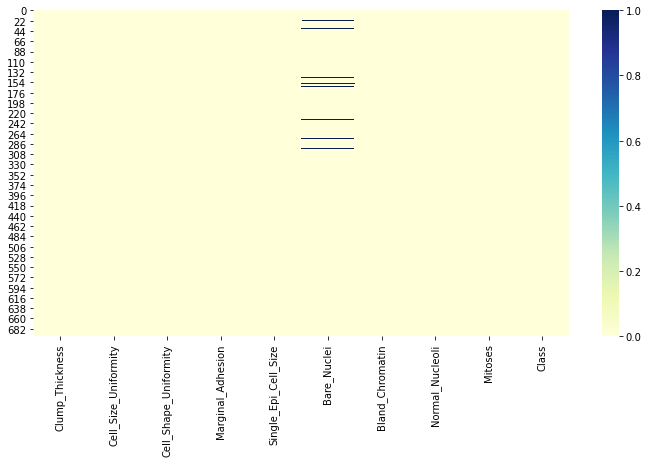

In [8]:
plt.figure(figsize =(12,6))
sns.heatmap(df.isnull(), cmap='YlGnBu')

In [9]:
df.isna().sum()

Clump_Thickness           0
Cell_Size_Uniformity      0
Cell_Shape_Uniformity     0
Marginal_Adhesion         0
Single_Epi_Cell_Size      0
Bare_Nuclei              16
Bland_Chromatin           0
Normal_Nucleoli           0
Mitoses                   0
Class                     0
dtype: int64

In [10]:
df['Bare_Nuclei'].describe()

count    683.000000
mean       3.544656
std        3.643857
min        1.000000
25%        1.000000
50%        1.000000
75%        6.000000
max       10.000000
Name: Bare_Nuclei, dtype: float64

<AxesSubplot:xlabel='Bare_Nuclei', ylabel='count'>

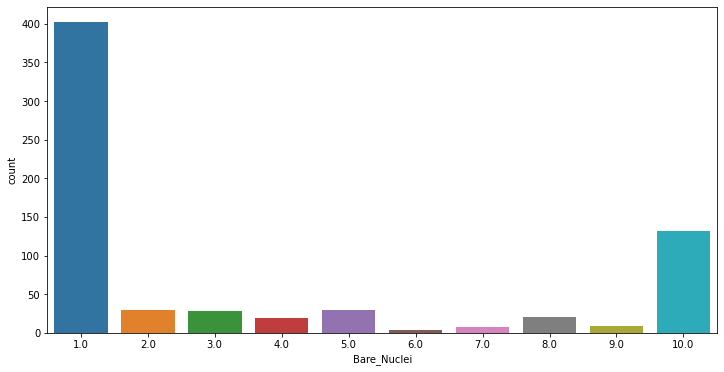

In [11]:
plt.figure(figsize =(12,6))
sns.countplot(data=df , x=df['Bare_Nuclei'])

We fill NA values with 1 because based on descriptive statistics of column Bare_Nuclei it won't differ that much.

In [12]:
df['Bare_Nuclei'] = df['Bare_Nuclei'].fillna(value=1)

In [13]:
df.isna().sum()

Clump_Thickness          0
Cell_Size_Uniformity     0
Cell_Shape_Uniformity    0
Marginal_Adhesion        0
Single_Epi_Cell_Size     0
Bare_Nuclei              0
Bland_Chromatin          0
Normal_Nucleoli          0
Mitoses                  0
Class                    0
dtype: int64

# Visualization

# Benign vs. Malignant

Benign 458
Malignant 241


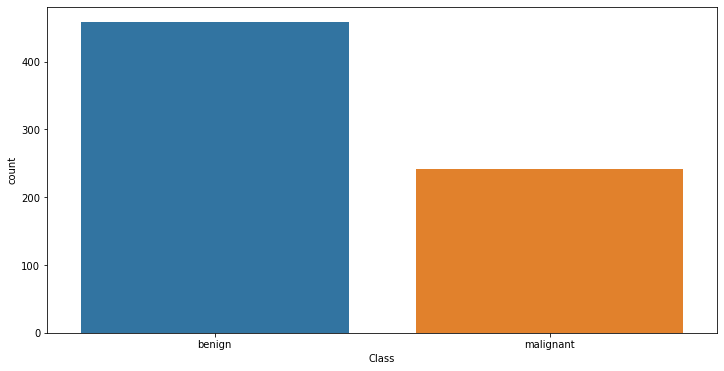

In [14]:
plt.figure(figsize =(12,6))
sns.countplot(data=df , x='Class')
B , M = df["Class"].value_counts()
print("Benign",B)
print("Malignant",M)

# Clump Thickness

In [15]:
# indicating grouping of cancer cells in multilayer
df_clump=pd.crosstab(df['Class'],df['Clump_Thickness'])
df_clump

Clump_Thickness,1,2,3,4,5,6,7,8,9,10
Class,,,,,,,,,,
benign,142,46,96,68,85,16,1,4,0,0
malignant,3,4,12,12,45,18,22,42,14,69


<AxesSubplot:xlabel='Clump_Thickness', ylabel='count'>

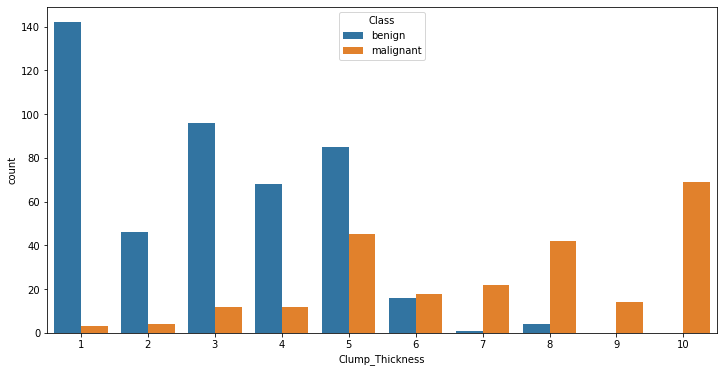

In [16]:
plt.figure(figsize =(12,6))
sns.countplot(data=df,x='Clump_Thickness',hue='Class')

# Cell Size Uniformity

In [17]:
# indicating metastasis to lymph nodes
df_cell_size=pd.crosstab(df['Class'],df['Cell_Size_Uniformity'])
df_cell_size

Cell_Size_Uniformity,1,2,3,4,5,6,7,8,9,10
Class,,,,,,,,,,
benign,380,37,27,9,0,2,1,1,1,0
malignant,4,8,25,31,30,25,18,28,5,67


<AxesSubplot:xlabel='Cell_Size_Uniformity', ylabel='count'>

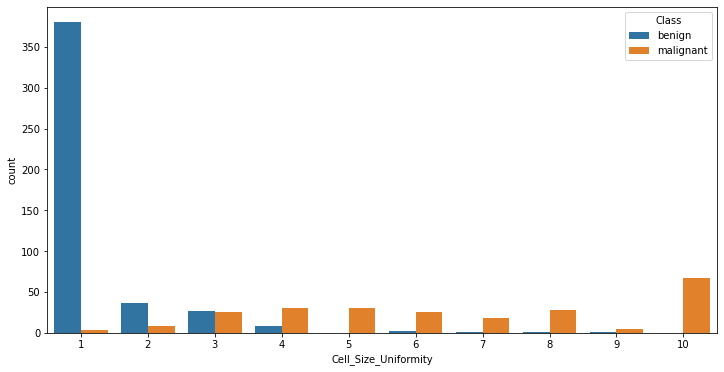

In [18]:
plt.figure(figsize =(12,6))
sns.countplot(data=df,x='Cell_Size_Uniformity',hue='Class')

# Cell Shape Uniforimity

In [19]:
# identifying cancerous cells of varying size
df_cell_size=pd.crosstab(df['Class'],df['Cell_Shape_Uniformity'])
df_cell_size

Cell_Shape_Uniformity,1,2,3,4,5,6,7,8,9,10
Class,,,,,,,,,,
benign,351,52,33,13,3,3,2,1,0,0
malignant,2,7,23,31,31,27,28,27,7,58


<AxesSubplot:xlabel='Cell_Shape_Uniformity', ylabel='count'>

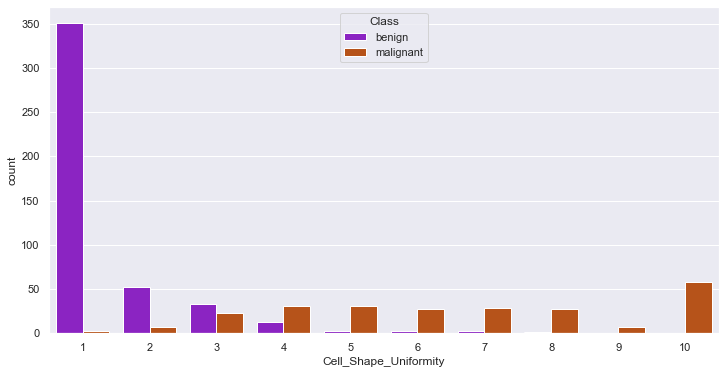

In [20]:
plt.figure(figsize =(12,6))
sns.set_theme(style="darkgrid")
sns.countplot(x="Cell_Shape_Uniformity", data=df , hue='Class' ,palette='gnuplot')

# Marginal Adhesion 

In [21]:
# suggesting loss of adhesion, i.e., a sign of malignancy but the cancerous cells lose this property so this
#retention of adhesion is an indication of malignancy
marg_adh = pd.crosstab(df['Class'],df['Marginal_Adhesion'])
marg_adh

Marginal_Adhesion,1,2,3,4,5,6,7,8,9,10
Class,,,,,,,,,,
benign,375,37,31,5,4,4,0,0,1,1
malignant,32,21,27,28,19,18,13,25,4,54


<AxesSubplot:xlabel='Marginal_Adhesion', ylabel='count'>

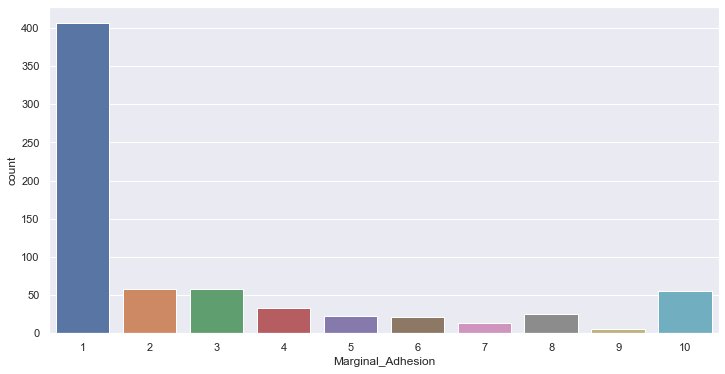

In [22]:
plt.figure(figsize =(12,6))
sns.countplot(data=df , x='Marginal_Adhesion')

<AxesSubplot:xlabel='Marginal_Adhesion', ylabel='count'>

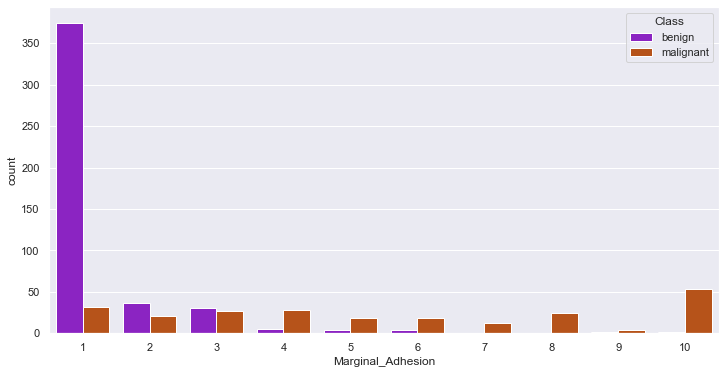

In [23]:
plt.figure(figsize =(12,6))
sns.countplot(x="Marginal_Adhesion", data=df , hue='Class' ,palette='gnuplot')

# Single Epi Cell Size

In [24]:
# if the SECS become larger, it may be a malignant cell
sing_epi = pd.crosstab(df['Class'],df['Single_Epi_Cell_Size'])
sing_epi

Single_Epi_Cell_Size,1,2,3,4,5,6,7,8,9,10
Class,,,,,,,,,,
benign,46,363,29,7,5,2,3,2,0,1
malignant,1,23,43,41,34,39,9,19,2,30


<AxesSubplot:xlabel='Single_Epi_Cell_Size', ylabel='count'>

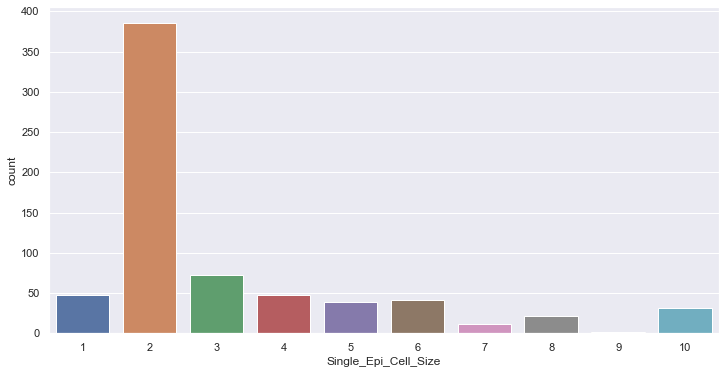

In [25]:
plt.figure(figsize =(12,6))
sns.countplot(data=df , x='Single_Epi_Cell_Size')

<AxesSubplot:xlabel='Single_Epi_Cell_Size', ylabel='count'>

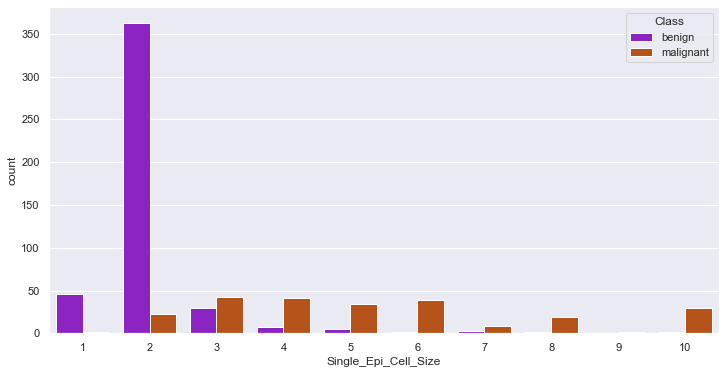

In [26]:
plt.figure(figsize =(12,6))
sns.countplot(x="Single_Epi_Cell_Size", data=df , hue='Class' ,palette='gnuplot')

# Bare Nuclei

In [27]:
# without cytoplasm coating, found in benign tumors
ba_nu = pd.crosstab(df['Class'],df['Bare_Nuclei'])
ba_nu

Bare_Nuclei,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
Class,,,,,,,,,,
benign,401,21,14,6,10,0,1,2,0,3
malignant,17,9,14,13,20,4,7,19,9,129


<AxesSubplot:xlabel='Bare_Nuclei', ylabel='Count'>

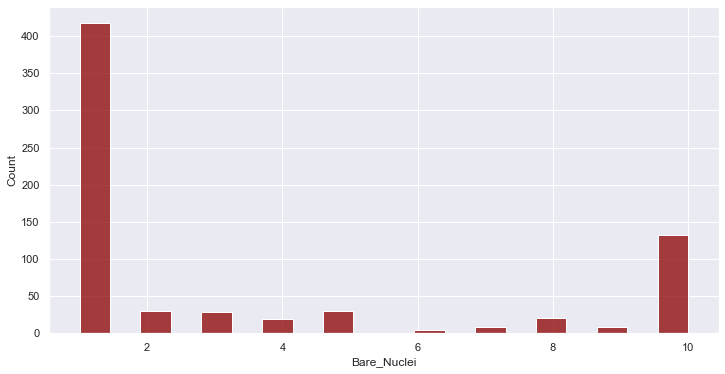

In [28]:
plt.figure(figsize =(12,6))
sns.histplot(df['Bare_Nuclei'], color='darkred', bins=20 ,legend=True)

<AxesSubplot:xlabel='Bare_Nuclei', ylabel='count'>

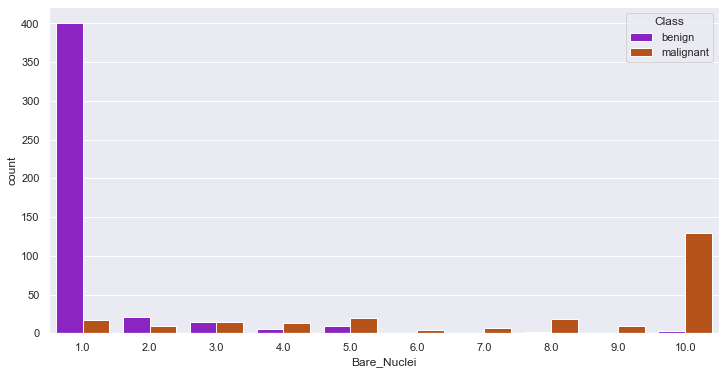

In [29]:
plt.figure(figsize =(12,6))
sns.countplot(x="Bare_Nuclei", data=df , hue='Class' ,palette='gnuplot')

# Bland Chromatin 

In [30]:
# usually found in benign cells
bl_ch = pd.crosstab(df['Class'],df['Bland_Chromatin'])
bl_ch

Bland_Chromatin,1,2,3,4,5,6,7,8,9,10
Class,,,,,,,,,,
benign,150,159,129,8,4,1,7,0,0,0
malignant,2,7,36,32,30,9,66,28,11,20


<AxesSubplot:xlabel='Class', ylabel='Bland_Chromatin'>

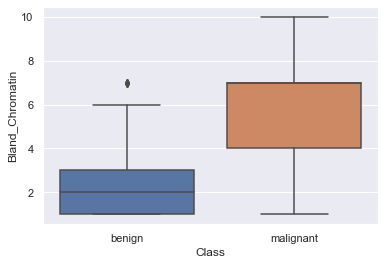

In [31]:
sns.boxplot(data=df,x='Class',y='Bland_Chromatin')

<AxesSubplot:xlabel='Bland_Chromatin', ylabel='count'>

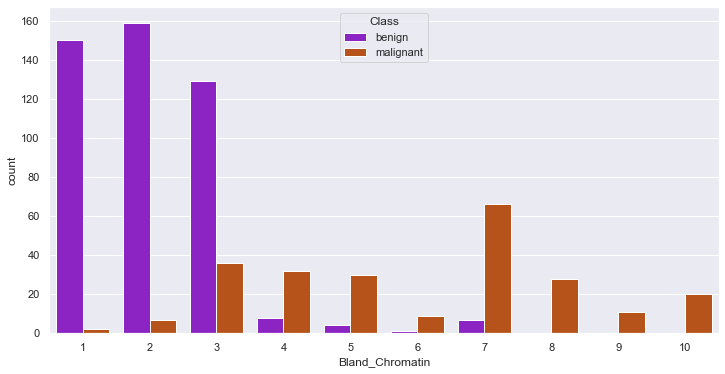

In [32]:
plt.figure(figsize =(12,6))
sns.countplot(x="Bland_Chromatin", data=df , hue='Class' ,palette='gnuplot')

# Normal Nucleoli


In [33]:
# generally very small in benign cell
no_nu = pd.crosstab(df['Class'],df['Normal_Nucleoli'])
no_nu

Normal_Nucleoli,1,2,3,4,5,6,7,8,9,10
Class,,,,,,,,,,
benign,402,30,12,1,2,4,2,4,1,0
malignant,41,6,32,17,17,18,14,20,15,61


<AxesSubplot:xlabel='Class', ylabel='Normal_Nucleoli'>

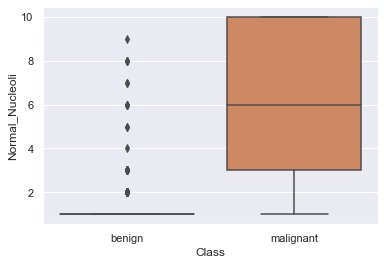

In [34]:
sns.boxplot(data=df,x='Class',y='Normal_Nucleoli')

<AxesSubplot:xlabel='Normal_Nucleoli', ylabel='count'>

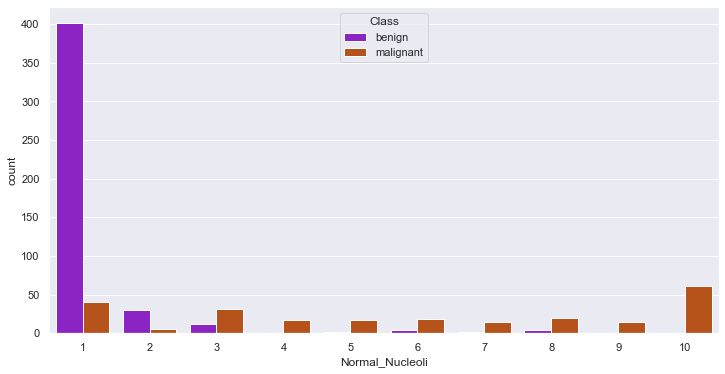

In [35]:
plt.figure(figsize =(12,6))
sns.countplot(x="Normal_Nucleoli", data=df , hue='Class' ,palette='gnuplot')

# Mitoses

In [36]:
# the process in cell division by which the nucleus divides
mit =pd.crosstab(df['Class'],df['Mitoses'])
mit

Mitoses,1,2,3,4,5,6,7,8,10
Class,,,,,,,,,
benign,445,8,2,0,1,0,1,1,0
malignant,134,27,31,12,5,3,8,7,14


<AxesSubplot:xlabel='Class', ylabel='Mitoses'>

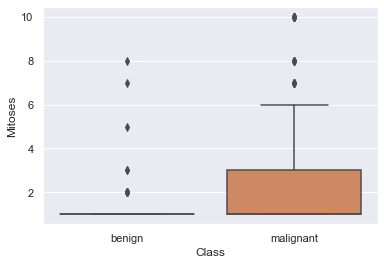

In [37]:
sns.boxplot(data=df,x="Class",y="Mitoses",)

<AxesSubplot:xlabel='Mitoses', ylabel='count'>

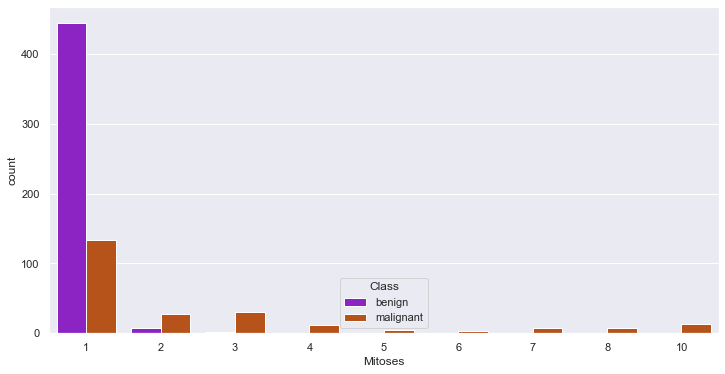

In [38]:
plt.figure(figsize =(12,6))
sns.countplot(x="Mitoses", data=df , hue='Class' ,palette='gnuplot')

# Converting Categorical Feature

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Clump_Thickness        699 non-null    int64  
 1   Cell_Size_Uniformity   699 non-null    int64  
 2   Cell_Shape_Uniformity  699 non-null    int64  
 3   Marginal_Adhesion      699 non-null    int64  
 4   Single_Epi_Cell_Size   699 non-null    int64  
 5   Bare_Nuclei            699 non-null    float64
 6   Bland_Chromatin        699 non-null    int64  
 7   Normal_Nucleoli        699 non-null    int64  
 8   Mitoses                699 non-null    int64  
 9   Class                  699 non-null    object 
dtypes: float64(1), int64(8), object(1)
memory usage: 54.7+ KB


In [40]:
_class =pd.get_dummies(df['Class'],drop_first=True)
_class

,malignant
0,0
1,0
2,0
3,0
4,0
...,...
694,0
695,0
696,1
697,1


In [41]:
df=pd.concat([df,_class],axis=1)
df.tail()

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class,malignant
694,3,1,1,1,3,2.0,1,1,1,benign,0
695,2,1,1,1,2,1.0,1,1,1,benign,0
696,5,10,10,3,7,3.0,8,10,2,malignant,1
697,4,8,6,4,3,4.0,10,6,1,malignant,1
698,4,8,8,5,4,5.0,10,4,1,malignant,1


# Train-Test Split

In [42]:
df.columns


Index(['Clump_Thickness', 'Cell_Size_Uniformity', 'Cell_Shape_Uniformity',
       'Marginal_Adhesion', 'Single_Epi_Cell_Size', 'Bare_Nuclei',
       'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class', 'malignant'],
      dtype='object')

In [43]:
x = df[['Clump_Thickness', 'Cell_Shape_Uniformity', 'Cell_Shape_Uniformity','Marginal_Adhesion'
        ,'Single_Epi_Cell_Size','Bare_Nuclei', 'Bland_Chromatin','Normal_Nucleoli','Mitoses']]
x

,Clump_Thickness,Cell_Shape_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1
695,2,1,1,1,2,1.0,1,1,1
696,5,10,10,3,7,3.0,8,10,2
697,4,6,6,4,3,4.0,10,6,1


In [44]:
y = df['malignant']
y

0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Name: malignant, Length: 699, dtype: uint8

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3 , random_state=101)

In [46]:
y_train.head()

435    1
541    0
381    1
611    1
647    0
Name: malignant, dtype: uint8

In [47]:
y_test

691    1
517    0
258    0
437    0
213    1
      ..
690    0
654    0
400    1
533    0
496    0
Name: malignant, Length: 210, dtype: uint8

In [48]:
y_test.astype('Int64')

691    1
517    0
258    0
437    0
213    1
      ..
690    0
654    0
400    1
533    0
496    0
Name: malignant, Length: 210, dtype: Int64

In [49]:
y_test.head()

691    1
517    0
258    0
437    0
213    1
Name: malignant, dtype: uint8

In [50]:
x_train.shape

(489, 9)

In [51]:
x_test.shape

(210, 9)

In [52]:
x_train.head()

,Clump_Thickness,Cell_Shape_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
435,10,10,10,1,3,10.0,5,1,1
541,3,1,1,1,2,1.0,1,1,1
381,10,3,3,6,4,10.0,7,8,4
611,5,10,10,10,5,2.0,8,5,1
647,1,1,1,3,2,1.0,1,1,1


In [53]:
x_test.head()

,Clump_Thickness,Cell_Shape_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
691,5,10,10,5,4,5.0,4,4,1
517,1,1,1,1,1,1.0,2,1,1
258,3,1,1,1,2,1.0,3,1,1
437,4,1,1,1,2,1.0,1,1,1
213,10,10,10,10,7,10.0,7,10,4


# Logestic Regression

In [54]:
logreg =LogisticRegression(max_iter=100, C=5, random_state=101)

In [55]:
logreg.fit(x_train, y_train)

LogisticRegression(C=5, random_state=101)

In [56]:
logreg.predict_proba(x_test)

array([[2.38500120e-02, 9.76149988e-01],
       [9.98660631e-01, 1.33936929e-03],
       [9.94351203e-01, 5.64879705e-03],
       [9.95164686e-01, 4.83531387e-03],
       [4.92153054e-06, 9.99995078e-01],
       [9.01439307e-01, 9.85606933e-02],
       [2.36756000e-02, 9.76324400e-01],
       [9.84663413e-01, 1.53365866e-02],
       [1.02372141e-02, 9.89762786e-01],
       [9.96680532e-01, 3.31946806e-03],
       [3.80460466e-04, 9.99619540e-01],
       [6.03063783e-01, 3.96936217e-01],
       [5.38769881e-04, 9.99461230e-01],
       [2.77810976e-02, 9.72218902e-01],
       [9.94035118e-01, 5.96488207e-03],
       [9.97159527e-01, 2.84047327e-03],
       [9.28484890e-01, 7.15151097e-02],
       [9.46458521e-01, 5.35414792e-02],
       [1.72514465e-04, 9.99827486e-01],
       [1.08124189e-04, 9.99891876e-01],
       [1.03070268e-06, 9.99998969e-01],
       [4.88685592e-03, 9.95113144e-01],
       [9.88412573e-01, 1.15874273e-02],
       [9.96680532e-01, 3.31946806e-03],
       [9.990218

In [57]:
pred_logreg = logreg.predict(x_test)
pred_logreg

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], dtype=uint8)

In [58]:
benign = 0
malignant = 0
for i in pred_logreg:
    if i ==0:
        benign+=1
    else :
        malignant+=1
print('benign={}\nmalignant={}'.format(benign,malignant))
        

benign=135
malignant=75


In [59]:
# Evaluation
confusion_matrix(y_test,pred_logreg)

array([[127,   2],
       [  8,  73]], dtype=int64)

In [60]:
accuracy=accuracy_score(y_test,pred_logreg)
accuracy

0.9523809523809523

In [61]:
df['Bare_Nuclei']=df['Bare_Nuclei'].astype('Int64')

In [62]:
f1_score = f1_score(y_test, pred_logreg, average='macro')
f1_score

0.949009324009324

In [63]:
prec_score=precision_score(y_test, pred_logreg, average='micro')
prec_score

0.9523809523809523

In [64]:
tn, fp, fn, tp = confusion_matrix(y_test, pred_logreg).ravel()
specificity = tn / (tn+fp)
specificity

0.9844961240310077

In [65]:
sensitivity = tp/(tp+fn)
sensitivity

0.9012345679012346

In [66]:
# k-fold cross validation
max_iter=[200,300,400,500]
c=[1,2,3,4]
grid=itertools.product(max_iter,c)
grid=pd.DataFrame(grid,index=range(1,17),columns=[['Max_Iter','C']])
grid

,Max_Iter,C
1,200,1
2,200,2
3,200,3
4,200,4
5,300,1
6,300,2
7,300,3
8,300,4
9,400,1
10,400,2


In [67]:
sc=[]
for i in range (0,16):
    lor=LogisticRegression(max_iter=grid.iloc[i,0],C=grid.iloc[i,1],random_state=101)
    scores=cross_val_score(lor, X=x_train,y=y_train.values.ravel(), cv=5, scoring='accuracy')
    sc.append(np.mean(scores))
sc    

[0.963181148748159,
 0.963181148748159,
 0.963181148748159,
 0.963181148748159,
 0.963181148748159,
 0.963181148748159,
 0.963181148748159,
 0.963181148748159,
 0.963181148748159,
 0.963181148748159,
 0.963181148748159,
 0.963181148748159,
 0.963181148748159,
 0.963181148748159,
 0.963181148748159,
 0.963181148748159]

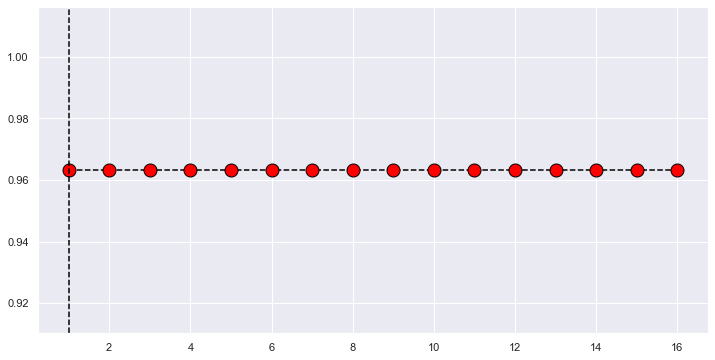

In [68]:
plt.figure(figsize=(12,6))
plt.plot(range(1,17),sc,marker='o',markerfacecolor='red',color='black',
        markeredgecolor='black',markeredgewidth=1,markersize=13,linestyle='--')
plt.axvline(np.argmax(sc)+1,linestyle='--',color='black')

دلیل این اتفاق ممکن است به این خاطر باشد که تمامی فیچرها عددی بین 1 تا 10 دارند و بیشترین فراوانی این داده ها برای مقادیر 1 و 2 هستند به عبارتی چوله به راست هستند به نظر بهترین راه برای جلوگیری از این اتفاق،نرمال کردن داده ها با استفاده از تبدیل باکس کاکس باشد

In [69]:
logr=LogisticRegression(max_iter=grid.iloc[2,0],C=grid.iloc[1,1],random_state=101)

In [70]:
logr.fit(x_train,y_train)

LogisticRegression(C=2, max_iter=200, random_state=101)

In [71]:
pred_logr=logr.predict(x_test)

In [72]:
c_m=confusion_matrix(y_test,pred_logr)
c_m

array([[127,   2],
       [  8,  73]], dtype=int64)

In [73]:
TN=c_m[0,0]
TP=c_m[1,1]
FN=c_m[1,0]
FP=c_m[0,1]

In [74]:
evaluated_model=pd.DataFrame({'Accuracy':(TN+TP)/(TP+TN+FN+FP),
                             'Precision':TP/(TP+FP),
                            'Sensitivity':TP/(TP+FN),
                            'Specificity':TN/(TN+FP)},
                            index=["Logistic Regression"])
evaluated_model

,Accuracy,Precision,Sensitivity,Specificity
Logistic Regression,0.952381,0.973333,0.901235,0.984496


# Decision Tree


In [75]:
Class_tree=DecisionTreeClassifier(max_depth=5,min_samples_leaf=5,ccp_alpha=0.01)

In [76]:
fit_tree=Class_tree.fit(x_train,y_train)

In [77]:
max_depth=[4,6,8]
min_samples_leaf=[5,10,15]
ccp_alpha=[0.0001,0.001,0.01]
grid=list(itertools.product(max_depth,min_samples_leaf,ccp_alpha))
grid=pd.DataFrame(grid,index=range(1,28),columns=['max_depth','min_samples_leaf','ccp_alpha'])
grid

,max_depth,min_samples_leaf,ccp_alpha
1,4,5,0.0001
2,4,5,0.0010
3,4,5,0.0100
4,4,10,0.0001
5,4,10,0.0010
6,4,10,0.0100
7,4,15,0.0001
8,4,15,0.0010
9,4,15,0.0100
10,6,5,0.0001


In [78]:
sco=[]
for i in range(1,28):
    reg_tree=DecisionTreeClassifier(max_depth=grid.loc[i,'max_depth'],
                               min_samples_leaf=grid.loc[i,'min_samples_leaf'],
                               ccp_alpha=grid.loc[i,'ccp_alpha'],random_state=101)
    Scores=cross_val_score(reg_tree,X=x_train,y=y_train,
                           cv=10,scoring='accuracy')
    sco.append(np.mean(Scores))
sco

[0.9488945578231294,
 0.9488945578231294,
 0.9345663265306122,
 0.95093537414966,
 0.95093537414966,
 0.9447704081632654,
 0.9181122448979592,
 0.9181122448979592,
 0.9181122448979592,
 0.940688775510204,
 0.940688775510204,
 0.9345663265306122,
 0.95093537414966,
 0.95093537414966,
 0.9447704081632654,
 0.9181122448979592,
 0.9181122448979592,
 0.9181122448979592,
 0.940688775510204,
 0.940688775510204,
 0.9345663265306122,
 0.95093537414966,
 0.95093537414966,
 0.9447704081632654,
 0.9181122448979592,
 0.9181122448979592,
 0.9181122448979592]

Text(0, 0.5, 'accuracy')

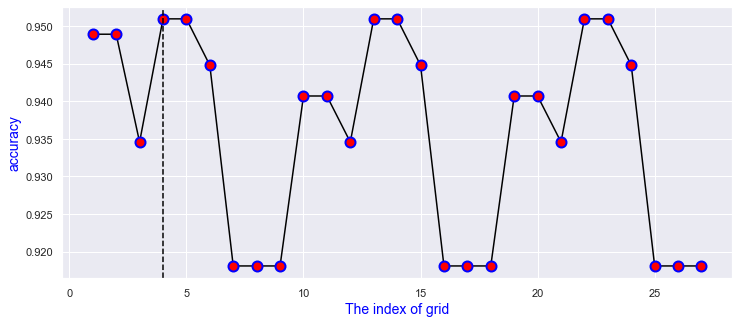

In [79]:
plt.figure(figsize=(12,5))
plt.plot(range(1,28),sco,marker='o',markersize=10,
         markerfacecolor='red',color='black',
        markeredgecolor='blue',markeredgewidth=2)
plt.axvline(np.argmax(sco)+1,linestyle='--',color='black')
plt.xlabel('The index of grid',fontsize=14,color='blue')
plt.ylabel('accuracy',fontsize=14,color='blue')

# Applying the Best Model

In [80]:
class_tree=DecisionTreeClassifier(max_depth=grid.loc[4,'max_depth'],
                               min_samples_leaf=grid.loc[4,'min_samples_leaf'],
                               ccp_alpha=grid.loc[4,'ccp_alpha'],random_state=101)
class_tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0001, max_depth=4, min_samples_leaf=10,
                       random_state=101)

In [81]:
pred_tree=class_tree.predict(x_test)
pred_tree

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], dtype=uint8)

In [82]:
c_m=confusion_matrix(y_test,pred_tree)
c_m

array([[123,   6],
       [  9,  72]], dtype=int64)

In [83]:
TN=c_m[0,0]
TP=c_m[1,1]
FN=c_m[1,0]
FP=c_m[0,1]
evaluated_model=evaluated_model.append(pd.DataFrame({'Accuracy':(TN+TP)/(TP+TN+FN+FP),
                            'Precision':TP/(TP+FP),
                           'Sensitivity':TP/(TP+FN),
                           'Specificity':TN/(TN+FP)},
                           index=["Decision Tree"]))
evaluated_model

,Accuracy,Precision,Sensitivity,Specificity
Logistic Regression,0.952381,0.973333,0.901235,0.984496
Decision Tree,0.928571,0.923077,0.888889,0.953488


# Bagging

In [84]:
bagging_class=RandomForestClassifier(n_estimators=300,max_features=9,random_state=123)

# K-Fold for Bagging

In [85]:
n_estimators=[50,100,150]
min_samples_leaf=[3,5,7]
grid=list(itertools.product(n_estimators,min_samples_leaf))
grid=pd.DataFrame(grid,index=range(1,10),columns=['n_estimators','min_samples_leaf'])
grid

,n_estimators,min_samples_leaf
1,50,3
2,50,5
3,50,7
4,100,3
5,100,5
6,100,7
7,150,3
8,150,5
9,150,7


In [86]:
scor=[]
for i in range(1,10):
    rfr=RandomForestClassifier(n_estimators=grid.loc[i,'n_estimators'],
                               min_samples_leaf=grid.loc[i,'min_samples_leaf']
                            ,random_state=101
                             )
    Scores=cross_val_score(rfr,X=x_train,y=y_train,
                           cv=5,scoring='accuracy')
    scor.append(np.mean(Scores));
scor

[0.963223227435304,
 0.9611824111087733,
 0.9591205554386703,
 0.963223227435304,
 0.9652640437618345,
 0.9611613717652009,
 0.963223227435304,
 0.963223227435304,
 0.9591205554386703]

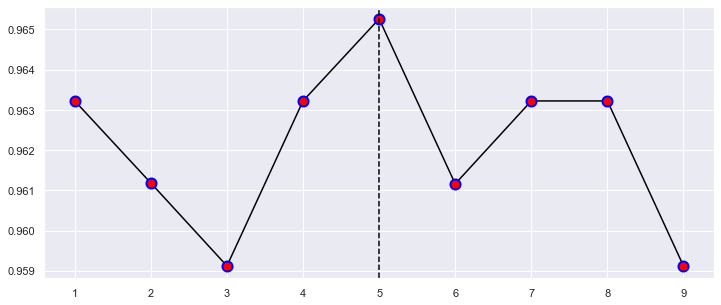

In [87]:
plt.figure(figsize=(12,5))
plt.plot(range(1,10),scor,marker='o',markersize=10,
         markerfacecolor='red',color='black',
        markeredgecolor='blue',markeredgewidth=2)
plt.axvline(np.argmax(scor)+1,linestyle='--',color='black')

# The Best Model for Bagging

In [88]:
bag=RandomForestClassifier(n_estimators=grid.loc[5,'n_estimators'],
                               min_samples_leaf=grid.loc[5,'min_samples_leaf']
                           ,random_state=101)
bag.fit(x_train,y_train)

RandomForestClassifier(min_samples_leaf=5, random_state=101)

# Prediction on test

In [89]:
pred_bag=bag.predict(x_test)
pred_bag

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], dtype=uint8)

In [90]:
C_M=confusion_matrix(y_test,pred_bag)
C_M

array([[127,   2],
       [  3,  78]], dtype=int64)

In [91]:
TN=C_M[0,0]
TP=C_M[1,1]
FN=C_M[1,0]
FP=C_M[0,1]
evaluated_model=evaluated_model.append(pd.DataFrame({'Accuracy':(TN+TP)/(TP+TN+FN+FP),
                            'Precision':TP/(TP+FP),
                           'Sensitivity':TP/(TP+FN),
                           'Specificity':TN/(TN+FP)},
                           index=["Bagging"]))
evaluated_model

,Accuracy,Precision,Sensitivity,Specificity
Logistic Regression,0.952381,0.973333,0.901235,0.984496
Decision Tree,0.928571,0.923077,0.888889,0.953488
Bagging,0.976190,0.975000,0.962963,0.984496


# Random Forest

In [92]:
RFC=RandomForestClassifier(n_estimators=100,max_depth=4,max_features=5,min_samples_leaf=1,random_state=101)
n_estimators=[50,100,150]
min_samples_leaf=[3,5,7]
max_features=[2,3,4]
grid=list(itertools.product(n_estimators,min_samples_leaf,max_features))
grid=pd.DataFrame(grid,index=range(1,28),columns=['n_estimators','min_samples_leaf','max_features'])
grid

,n_estimators,min_samples_leaf,max_features
1,50,3,2
2,50,3,3
3,50,3,4
4,50,5,2
5,50,5,3
6,50,5,4
7,50,7,2
8,50,7,3
9,50,7,4
10,100,3,2


In [93]:
SC=[]
for i in range(1,28):
    RFC=RandomForestClassifier(n_estimators=grid.loc[i,'n_estimators'],
                               min_samples_leaf=grid.loc[i,'min_samples_leaf'],
                               max_features=grid.loc[i,'max_features'],random_state=101
                             )
    Scores=cross_val_score(RFC,X=x_train,y=y_train.values.ravel(),
                           cv=5,scoring='accuracy')
    SC.append(np.mean(Scores));
SC    

[0.9611824111087733,
 0.963223227435304,
 0.963223227435304,
 0.963223227435304,
 0.9611824111087733,
 0.9570797391121397,
 0.9632021880917314,
 0.9591205554386703,
 0.9529981064590786,
 0.963223227435304,
 0.963223227435304,
 0.9591415947822428,
 0.9652640437618345,
 0.9652640437618345,
 0.9570797391121397,
 0.9652640437618345,
 0.9611613717652009,
 0.9570797391121397,
 0.963223227435304,
 0.963223227435304,
 0.963223227435304,
 0.9652640437618345,
 0.963223227435304,
 0.9591205554386703,
 0.9652640437618345,
 0.9591205554386703,
 0.9591205554386703]

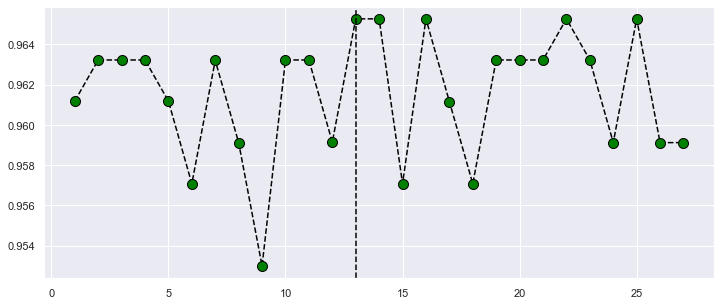

In [94]:
plt.figure(figsize=(12,5))
plt.plot(range(1,28),SC,marker='o',markersize=10,
         markerfacecolor='green',linestyle='--',color='black',
        markeredgecolor='black')
plt.axvline(np.argmax(SC)+1,color='black',linestyle='--')

# The Best Model for Random Forest

In [95]:
RFC=RandomForestClassifier(n_estimators=grid.loc[13,'n_estimators'],
                               min_samples_leaf=grid.loc[13,'min_samples_leaf'],
                               max_features=grid.loc[13,'max_features'],random_state=101)
RFC.fit(x_train,y_train)

RandomForestClassifier(max_features=2, min_samples_leaf=5, random_state=101)

### The Importance of Each Feature


In [96]:
RFC.feature_importances_
importance=pd.DataFrame(RFC.feature_importances_,index=[x_train.columns],columns=["importance"])
importance

,importance
Clump_Thickness,0.073254
Cell_Shape_Uniformity,0.217785
Cell_Shape_Uniformity,0.228624
Marginal_Adhesion,0.057778
Single_Epi_Cell_Size,0.074018
Bare_Nuclei,0.112212
Bland_Chromatin,0.145684
Normal_Nucleoli,0.079342
Mitoses,0.011302


<Figure size 1080x720 with 0 Axes>

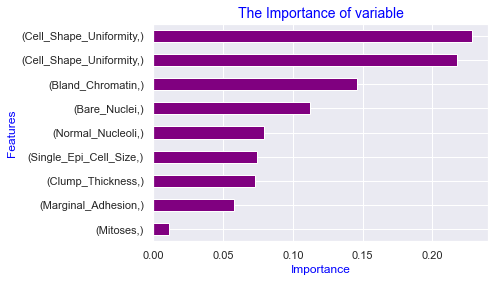

In [97]:
plt.figure(figsize=(15,10))
importance.sort_values(by='importance',ascending=True).plot(kind='barh',color='purple',legend=None)
plt.xlabel('Importance',color='blue',fontsize=12)
plt.ylabel('Features',color='blue',fontsize=12)
plt.title('The Importance of variable',color='blue',fontsize=14);

## Prediction on test data


In [98]:
pred_rfc=RFC.predict(x_test)
pred_rfc

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], dtype=uint8)

In [102]:
C_M=confusion_matrix(y_test,pred_rfc)
C_M

array([[127,   2],
       [  3,  78]], dtype=int64)

In [120]:
TN=C_M[0,0]
TP=C_M[1,1]
FN=C_M[1,0]
FP=C_M[0,1]
evaluated_model=evaluated_model.append(pd.DataFrame({'Accuracy':(TN+TP)/(TP+TN+FN+FP),
                            'Precision':TP/(TP+FP),
                           'Sensitivity':TP/(TP+FN),
                           'Specificity':TN/(TN+FP)},
                           index=["Random Forest"]))
evaluated_model

,Accuracy,Precision,Sensitivity,Specificity
Logistic Regression,0.952381,0.973333,0.901235,0.984496
Decision Tree,0.928571,0.923077,0.888889,0.953488
Bagging,0.976190,0.975000,0.962963,0.984496
Random Forest,0.976190,0.975000,0.962963,0.984496


# Linear Discriminant analysis

In [122]:
lda=LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)
lda.predict_proba(x_test)

array([[2.21488353e-03, 9.97785116e-01],
       [9.99999751e-01, 2.48912284e-07],
       [9.99996181e-01, 3.81927481e-06],
       [9.99997441e-01, 2.55931216e-06],
       [4.38462600e-11, 1.00000000e+00],
       [9.99594597e-01, 4.05402746e-04],
       [8.61215357e-05, 9.99913878e-01],
       [9.99987249e-01, 1.27509689e-05],
       [1.99438027e-05, 9.99980056e-01],
       [9.99998465e-01, 1.53530500e-06],
       [5.81054222e-06, 9.99994189e-01],
       [9.77640015e-01, 2.23599845e-02],
       [6.70331238e-07, 9.99999330e-01],
       [9.60704544e-04, 9.99039295e-01],
       [9.99989456e-01, 1.05443446e-05],
       [9.99998971e-01, 1.02881359e-06],
       [9.99366850e-01, 6.33149592e-04],
       [9.99840529e-01, 1.59471065e-04],
       [8.05193994e-08, 9.99999919e-01],
       [3.39915074e-09, 9.99999997e-01],
       [3.58340024e-11, 1.00000000e+00],
       [6.58652890e-05, 9.99934135e-01],
       [9.99986846e-01, 1.31540126e-05],
       [9.99998465e-01, 1.53530500e-06],
       [9.999998

In [123]:
pred_lda=lda.predict(x_test)
pred_lda

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], dtype=uint8)

In [124]:
C_M=confusion_matrix(y_test,pred_lda)
C_M

array([[127,   2],
       [  5,  76]], dtype=int64)

In [125]:
TN=C_M[0,0]
TP=C_M[1,1]
FN=C_M[1,0]
FP=C_M[0,1]
evaluated_model=evaluated_model.append(pd.DataFrame({'Accuracy':(TN+TP)/(TP+TN+FN+FP),
                            'Precision':TP/(TP+FP),
                           'Sensitivity':TP/(TP+FN),
                           'Specificity':TN/(TN+FP)},
                           index=["LDA"]))
evaluated_model

,Accuracy,Precision,Sensitivity,Specificity
Logistic Regression,0.952381,0.973333,0.901235,0.984496
Decision Tree,0.928571,0.923077,0.888889,0.953488
Bagging,0.976190,0.975000,0.962963,0.984496
Random Forest,0.976190,0.975000,0.962963,0.984496
LDA,0.966667,0.974359,0.938272,0.984496


# SVM

In [129]:
from sklearn.svm import SVC
svc=SVC(C=1.0,
        kernel='poly', 
        degree=3,
random_state=101)
C=[1,2,3]
degree=[2,3,4]  
grid=itertools.product(C,degree)
grid=pd.DataFrame(grid,index=range(1,10),columns=['C','degree'])
grid

,C,degree
1,1,2
2,1,3
3,1,4
4,2,2
5,2,3
6,2,4
7,3,2
8,3,3
9,3,4


In [132]:
from sklearn.model_selection import cross_val_score
scsvc=[]
for i in range(0,9):
    svc=SVC(C=grid.iloc[i,0],
           degree=grid.iloc[i,1],random_state=101)
    scores=cross_val_score(estimator=svc,X=x_train,
                          y=y_train,
                          cv=10,scoring='accuracy')
    scsvc.append(np.mean(scores))
scsvc    

[0.9632227891156461,
 0.9632227891156461,
 0.9632227891156461,
 0.969345238095238,
 0.969345238095238,
 0.969345238095238,
 0.9673044217687075,
 0.9673044217687075,
 0.9673044217687075]

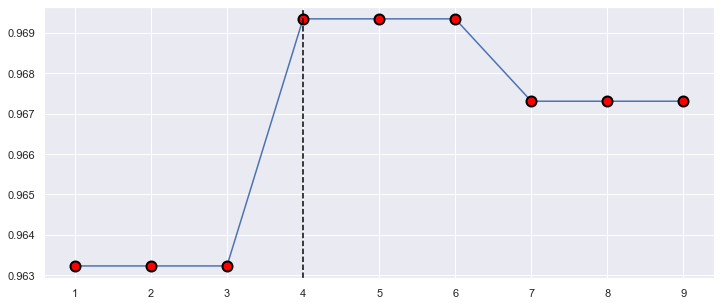

In [133]:
plt.figure(figsize=(12,5))
plt.plot(range(1,10),scsvc,
        marker='o',markersize=10,markerfacecolor='red',markeredgecolor='black',
        markeredgewidth=2)
plt.axvline(np.argmax(scsvc)+1,color='black',linestyle='--')

In [137]:
svc=SVC(C=grid.iloc[4,0],degree=grid.iloc[4,1],random_state=101)
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
pred_svc

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], dtype=uint8)

In [138]:
C_M=confusion_matrix(y_test,pred_svc)
C_M

array([[125,   4],
       [  3,  78]], dtype=int64)

In [139]:
TN=C_M[0,0]
TP=C_M[1,1]
FN=C_M[1,0]
FP=C_M[0,1]
evaluated_model=evaluated_model.append(pd.DataFrame({'Accuracy':(TN+TP)/(TP+TN+FN+FP),
                            'Precision':TP/(TP+FP),
                           'Sensitivity':TP/(TP+FN),
                           'Specificity':TN/(TN+FP)},
                           index=["SVM"]))
evaluated_model

,Accuracy,Precision,Sensitivity,Specificity
Logistic Regression,0.952381,0.973333,0.901235,0.984496
Decision Tree,0.928571,0.923077,0.888889,0.953488
Bagging,0.976190,0.975000,0.962963,0.984496
Random Forest,0.976190,0.975000,0.962963,0.984496
LDA,0.966667,0.974359,0.938272,0.984496
SVM,0.966667,0.951220,0.962963,0.968992


# KNN

In [142]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)

In [143]:
C_M=confusion_matrix(y_test,pred_knn)
C_M


array([[127,   2],
       [  4,  77]], dtype=int64)

In [144]:
TN=C_M[0,0]
TP=C_M[1,1]
FN=C_M[1,0]
FP=C_M[0,1]
evaluated_model=evaluated_model.append(pd.DataFrame({'Accuracy':(TN+TP)/(TP+TN+FN+FP),
                            'Precision':TP/(TP+FP),
                           'Sensitivity':TP/(TP+FN),
                           'Specificity':TN/(TN+FP)},
                           index=["KNN"]))
evaluated_model

,Accuracy,Precision,Sensitivity,Specificity
Logistic Regression,0.952381,0.973333,0.901235,0.984496
Decision Tree,0.928571,0.923077,0.888889,0.953488
Bagging,0.976190,0.975000,0.962963,0.984496
Random Forest,0.976190,0.975000,0.962963,0.984496
LDA,0.966667,0.974359,0.938272,0.984496
SVM,0.966667,0.951220,0.962963,0.968992
KNN,0.971429,0.974684,0.950617,0.984496


# The Best Model 

In [146]:
bag.fit(x_train,y_train)
pred_bag=bag.predict(x_test)
pred_bag

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], dtype=uint8)

In [151]:
C_M=confusion_matrix(y_test,pred_svc)
C_M

array([[125,   4],
       [  3,  78]], dtype=int64)

In [152]:
TN=C_M[0,0]
TP=C_M[1,1]
FN=C_M[1,0]
FP=C_M[0,1]
Accuracy=(TN+TP)/(TP+TN+FN+FP)
Accuracy 

0.9666666666666667

In [153]:
Precision=TP/(TP+FP)
Precision

0.9512195121951219

In [154]:
Sensitivity=TP/(TP+FN)
Sensitivity

0.9629629629629629

In [155]:
Specificity=TN/(TN+FP)
Specificity

0.9689922480620154